In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn import datasets

wine = datasets.load_wine()

In [21]:
df = pd.read_csv(r'C:\Users\USER\winequality_red.csv')

In [22]:
list(df.keys())

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
X = df.drop('quality', axis=1)
y= df['quality']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_val = train_test_split(X,y, test_size= 0.3)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_reg= RandomForestClassifier(random_state= 42)
model_fit = rfc_reg.fit(X_train,y_train)

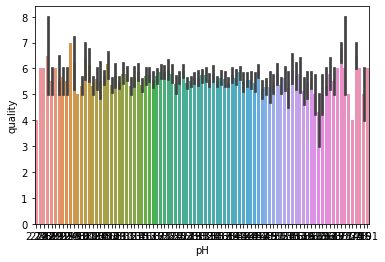

In [28]:
import seaborn as sns

sns.barplot(x=df['pH'], y=df['quality'],data =df)

In [29]:
y_pred = rfc_reg.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_val,y_pred)

In [31]:
print(score)

0.675


In [32]:
X.shape

(1599, 11)

In [33]:
y.shape

(1599,)

In [34]:
import os 
curdir = os.getcwd()

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os

model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(loss='categorical_crossentropy', optimizer='Adam' )
monitor = EarlyStopping(min_delta=1e-3, monitor='val_loss', patience=5, mode='auto', restore_best_weights=True,verbose=1)
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)
model.fit(X_train, y_train, validation_data=(X_test,y_val),callbacks=[tensorboard_cb,monitor], verbose=2, epochs=1000)

Epoch 1/1000
35/35 - 1s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 2/1000
35/35 - 0s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 3/1000
35/35 - 0s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 4/1000
35/35 - 0s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 5/1000
35/35 - 0s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 6/1000
Restoring model weights from the end of the best epoch.
35/35 - 0s - loss: 6.6998e-07 - val_loss: 6.7626e-07
Epoch 00006: early stopping


In [36]:
y_pred2= model.predict(X_test)

In [37]:
y_pred2

array([[ 1.40523720e+01],
       [ 6.15654230e-01],
       [ 6.67806923e-01],
       [ 2.37914845e-01],
       [ 5.93632412e+00],
       [ 1.51936245e+00],
       [ 6.76211643e+00],
       [ 4.95348072e+00],
       [ 2.50783145e-01],
       [ 1.68282592e+00],
       [ 7.95474052e+00],
       [ 7.31849337e+00],
       [ 1.52650106e+00],
       [ 2.29553533e+00],
       [ 2.36471105e+00],
       [ 7.71001518e-01],
       [ 2.74400640e+00],
       [ 6.05589676e+00],
       [ 5.87359810e+00],
       [ 3.95602083e+00],
       [ 7.57338190e+00],
       [ 7.60047722e+00],
       [ 4.67010307e+00],
       [ 4.33682537e+00],
       [ 5.42417479e+00],
       [ 2.46489286e+00],
       [ 8.46183586e+00],
       [ 6.38297462e+00],
       [ 1.21241961e+01],
       [ 1.26997864e+00],
       [ 8.87521935e+00],
       [ 8.37691367e-01],
       [ 6.35427415e-01],
       [ 5.59236193e+00],
       [ 2.72062564e+00],
       [ 8.67042661e-01],
       [ 4.64623070e+00],
       [ 1.43183112e+00],
       [ 6.0

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_val, y_pred2)
rmse = np.sqrt(mse)
print("The mean Squared error: {}".format(mse))
print("The root mean Squared error: {}".format(rmse))

The mean Squared error: 13.773980349040515
The root mean Squared error: 3.711331344550162


In [ ]:
%tensorboard --logdir {run_logdir}